## Семинар 8. Сравнение $k \ge 2$ независимых выборок.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

### Задача №1

В файле «Harvest.txt» представлены данные об урожае клубники (в квартах) с участков трех типов почв. Влияет ли (на уровне значимости 5%) тип почвы на урожайность?

In [2]:
data = pd.read_csv("Harvest.txt")
x = data['x']
y = data['y']
z = data['z']

In [3]:
st.shapiro(x)

ShapiroResult(statistic=0.9480554461479187, pvalue=0.028399568051099777)

In [4]:
st.shapiro(y)

ShapiroResult(statistic=0.9484426975250244, pvalue=0.02945292368531227)

In [5]:
st.shapiro(z)

ShapiroResult(statistic=0.9593520164489746, pvalue=0.0835050567984581)

Две из трех выборок ненормальные, будем применять непараметрические тесты

#### Boxplot

In [6]:
xyz = pd.concat([
    pd.DataFrame({'d': x, 'type': 'x'}),
    pd.DataFrame({'d': y, 'type': 'y'}),
    pd.DataFrame({'d': z, 'type': 'z'}),
])

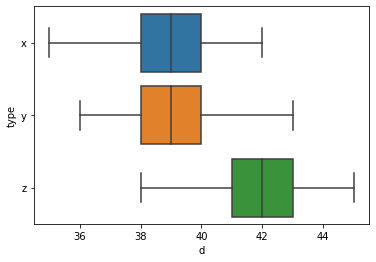

In [7]:
sns.boxplot(y="type", x="d", data=xyz, orient="h")
pass

Середина ящика - выборочная медиана. Левая сторона ящика квантиль 0.25, правая 0.75

По графику можем заподозрить, что третьи данные как-то отличаются от первых двух

#### Непараметрический Критерий Краскелла-Уоллиса

In [8]:
from scipy.stats import kruskal
kruskal (x, y, z)

KruskalResult(statistic=60.69515416264539, pvalue=6.610202049175609e-14)

p-value маленькое, значит различия есть

Хотим теперь проверить каждое с каждым

#### Критерий Неменьи

Необходимо сначала установить новый пакет на компьютер:

In [9]:
!pip install scikit_posthocs

https://scikit-posthocs.readthedocs.io/en/latest/ --- информация о пакете

https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_nemenyi/ --- информация о тесте Неменьи

In [10]:
import scikit_posthocs as sp

**Сначала нужно проверить краскелом уоллисом и не забыть про поправку Бонферрони!**

In [11]:
sp.posthoc_nemenyi([x, y, z])

,1,2,3
1,1.000000e+00,6.348433e-01,6.724819e-12
2,6.348433e-01,1.000000e+00,3.980842e-09
3,6.724819e-12,3.980842e-09,1.000000e+00


Таблица из p_value каждой пары. Видим, что у третьего столбца и строчки маленькие значения. Таблица симметрична, поэтому сделаем вывод, что 1 и 2 отличаются от 3 **при уровне значимости $\alpha / C_{k}^2$**, при k = 3. То есть уровень значимости == $\alpha / 3$

In [12]:
# Сравнение 1ой и 2ой выборки:
nem_res = sp.posthoc_nemenyi([x, y, z])
nem_res[1][2]

0.6348433060825146

In [13]:
# Если напишем так, получим другой результат (некорректный)!
# Потому что N (объем всех выборок) участвует в формуле статистики!
sp.posthoc_nemenyi([x, y])

,1,2
1,1.00000,0.30368
2,0.30368,1.00000


#### Критерий Данна
https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/

In [14]:
sp.posthoc_dunn([x, y, z], p_adjust = 'bonferroni') #Здесь учитывается поправка на множественные сравнения!

,1,2,3
1,1.000000e+00,1.000000e+00,2.202834e-12
2,1.000000e+00,1.000000e+00,1.495179e-09
3,2.202834e-12,1.495179e-09,1.000000e+00


In [15]:
# Сравнение 1ой и 3ей выборки:
dunn_res = sp.posthoc_dunn([x, y, z], p_adjust = 'bonferroni')
dunn_res[1][3]

2.202834347373232e-12

В случае если поправки нет

In [16]:
dunn_res = sp.posthoc_dunn([x, y, z], p_adjust = None)
dunn_res[1][3]*3

2.202834347373232e-12

In [17]:
# Если напишем так, получим другой результат (некорректный)!
# Потому что N участвует в формуле статистики!
sp.posthoc_dunn([x, z])

,1,2
1,1.000000e+00,1.417319e-12
2,1.417319e-12,1.000000e+00


### Задача №2

В школах работают учителя, администрация и обслуживающий персонал. В пенсионном фонде заинтересовались, одинаков ли средний возраст этих типов работников. В файле «School.txt» представлены данные выборки. Для какого наименьшего уровня значимости данные выборки показывают значимое отклонение от гипотезы однородности?

Пояснение: для какого минимального $\alpha$ мы можем отклонить $H_0$?

In [18]:
data = pd.read_csv("School.txt")
x = data['x']
y = data['y']
z = data['z']

In [19]:
st.shapiro(x)

ShapiroResult(statistic=0.974358320236206, pvalue=0.34483274817466736)

In [20]:
st.shapiro(y)

ShapiroResult(statistic=0.9641997814178467, pvalue=0.13327574729919434)

In [21]:
st.shapiro(z)

ShapiroResult(statistic=0.9784781336784363, pvalue=0.4897186756134033)

Все выборки независимые, также их можно считать нормальными

#### Boxplot

In [23]:
xyz = pd.concat([
    pd.DataFrame({'d': x, 'type': 'x'}),
    pd.DataFrame({'d': y, 'type': 'y'}),
    pd.DataFrame({'d': z, 'type': 'z'}),
])

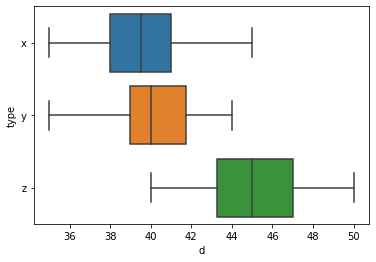

In [24]:
sns.boxplot(y="type", x="d", data=xyz, orient="h")
pass

Перед тем, как перейти к однофакторному дисперсионному анализу к ANOVA, применим **обязательно** критерий Бартлетта:

#### Критерий Бартлетта сравнения дисперсий

In [25]:
    from scipy.stats import bartlett
bartlett(x, y, z)

BartlettResult(statistic=0.6852796854974811, pvalue=0.7098938389381366)

#### Однофакторный дисперсионный анализ (ANOVA)

In [26]:
from scipy.stats import f_oneway
f_oneway(x, y, z)

F_onewayResult(statistic=91.01944660517835, pvalue=1.9061289727940732e-26)

Если после ANOVA надо применить попарные сравнения, то будем использовать следующие два

#### Критерий Шеффе

https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_scheffe/

In [27]:
sp.posthoc_scheffe([x, y, z])

,1,2,3
1,1.000000e+00,6.654789e-01,8.157592e-23
2,6.654789e-01,1.000000e+00,1.943010e-20
3,8.157592e-23,1.943010e-20,1.000000e+00


In [28]:
# Сравнение 1ой и 2ой выборки:
sch_res = sp.posthoc_scheffe([x, y, z])
sch_res[1][2]

0.6654788765891994

Не забываем **про поправки**, надо сравнивать не с $\alpha$, а c $\alpha / 3$

#### LSD Фишера

In [29]:
def LSD_Fisher(i, j, samples):
    # Вычисляем объемы выборок
    n1, n2 = len(samples[i]), len(samples[j])
    k = len(samples)
    # Объем всех выборок    
    N = np.sum([len(samples[l]) for l in range(k)])
    # сумма по всем выборкам    
    SSe = np.sum([np.var(samples[l], ddof=0) * len(samples[l]) for l in range(k)])
    stat = (np.mean(samples[i]) - np.mean(samples[j]))/np.sqrt(SSe / (N - k) * (1.0/n1 + 1.0/n2))
    return 2*np.min([ st.t.cdf(stat, N - k), 1 - st.t.cdf(stat, N - k)])

In [30]:
# Сравним x и z (нумерация в [x,y,z] идет с нуля!):
LSD_Fisher(0, 2, [x,y,z])

7.533536270359341e-24

Не забываем **про поправки**, надо сравнивать не с $\alpha$, а c $\alpha / 3$

#### t test (для справки)

In [31]:
sp.posthoc_ttest([x, y, z])

,1,2,3
1,1.000000e+00,3.550621e-01,2.054887e-20
2,3.550621e-01,1.000000e+00,2.359956e-19
3,2.054887e-20,2.359956e-19,1.000000e+00


In [32]:
tt_res = sp.posthoc_ttest([x, y, z])
tt_res[1][3]

2.0548873636571326e-20

In [33]:
from scipy.stats import ttest_ind
ttest_ind(x, z, equal_var=True)

Ttest_indResult(statistic=-11.748889218404093, pvalue=2.0548873636571326e-20)

In [34]:
sp.posthoc_ttest([x, y, z], p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,1.000000e+00,6.164662e-20
2,1.000000e+00,1.000000e+00,7.079867e-19
3,6.164662e-20,7.079867e-19,1.000000e+00


In [35]:
tt_bonf = sp.posthoc_ttest([x, y, z], p_adjust = 'bonferroni')
tt_bonf[1][3]/3

2.0548873636571326e-20